# Plot icons for atomtypes

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import SVG
from rdkit.Chem.Draw import rdMolDraw2D

In [32]:
def plot(smiles, withH=False):
    # Generate a molecule object from the SMILES string
    molecule = Chem.MolFromSmiles(smiles)
    if withH:
        molecule = Chem.AddHs(molecule)

    # Create an SVG drawer
    drawer = rdMolDraw2D.MolDraw2DSVG(400, 200)  # Specify the image size
    opts = drawer.drawOptions()
    
    for i, atom in enumerate(molecule.GetAtoms()):
        opts.atomLabels[i] = atom.GetSymbol()
        charge = atom.GetFormalCharge()
        if charge == -1:
            charge_str = "-"  # Just a minus sign for -1 charge
        elif charge > 0:
            charge_str = f"+{charge}"
            if charge == +1:
                charge_str = f"+"
        elif charge < -1:
            charge_str = str(charge)  # Include the full charge for values less than -1
        else:
            charge_str = ''
        opts.atomLabels[i] = f"{atom.GetSymbol()}{charge_str}"
            
    drawer.DrawMolecule(molecule)
    drawer.FinishDrawing()

    # Get the SVG string
    svg = drawer.GetDrawingText().replace('svg:', '')

    # Display the SVG
    display(SVG(svg))

## Plotting snippets for visualisation of atom types as described here: https://ambermd.org/antechamber/gaff.html#atomtype 

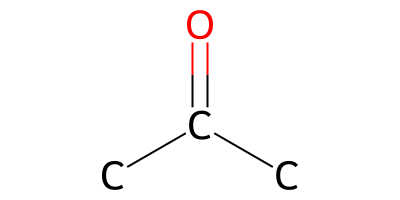

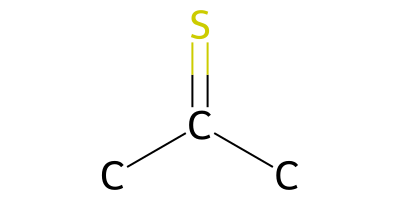

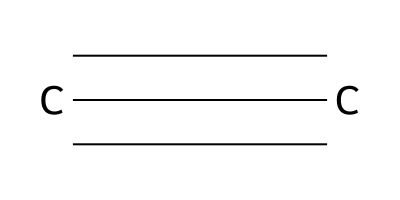

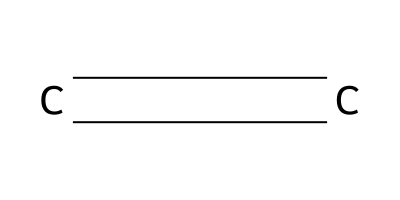

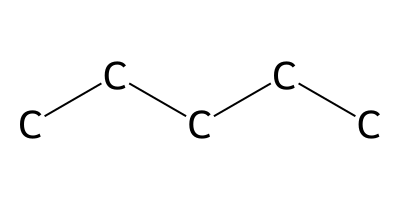

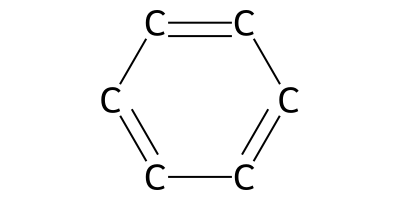

In [69]:
# for c: sp2 c in C=O, C=S --> correct
smiles = 'CC(=O)C' 
plot(smiles)
smiles = 'CC(=S)C'
plot(smiles)

# for c1:  for sp1 carbon --> correct, example Ethin
smiles = 'C#C'
plot(smiles)

# for c2: for sp2 C, aliphatic carbon, yes, Ethen
smiles = 'C=C'
plot(smiles)

# for c3: sp3 carbon --> correct --> pentane
smiles = 'CCCCC'
plot(smiles)

# for ca: aromatic carbon --> yes
smiles = 'c1ccccc1'
plot(smiles)



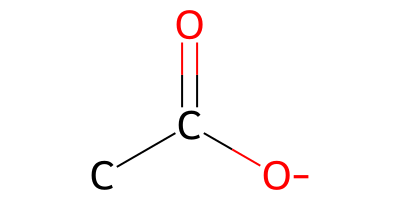

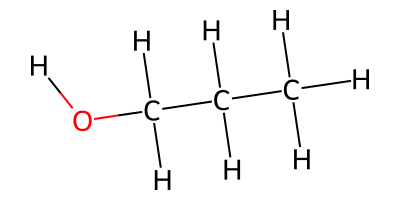

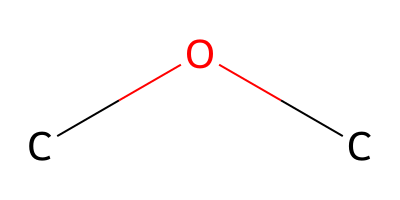

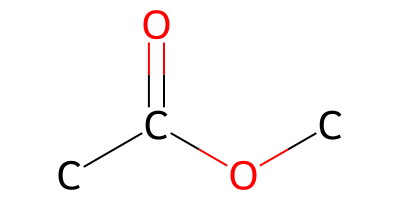

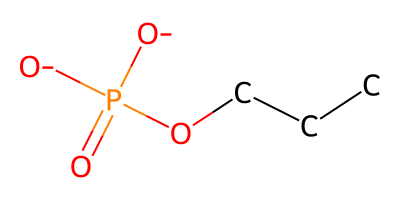

In [24]:
# for oxygens
# for o: sp2 oxygen --> correct, example: acetone or COO-
smiles = 'CC(=O)C'
smiles = 'CC(=O)[O-]'
plot(smiles)

# for oh: sp3 oxygen in hydroxyl group --> correct, example: ethanol
smiles = 'CCCO'
plot(smiles,True)

# for os: sp3 oxygen in ether or ester group --> correct, example: dimethyl ether
smiles = "COC"
plot(smiles)
smiles = "CC(=O)OC"
plot(smiles)

#for op: probably o bound to phosphorus --> not described on website
smiles = "CCCOP([O-])([O-])(=O)"
plot(smiles)

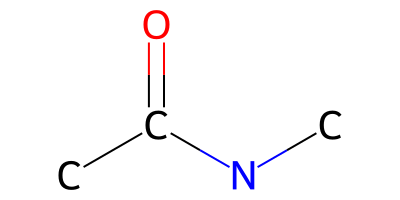

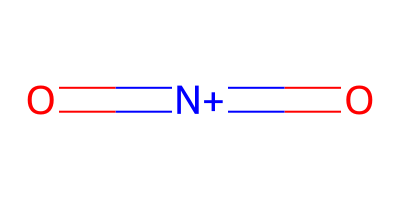

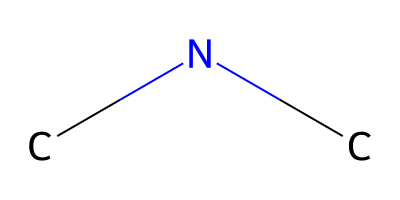

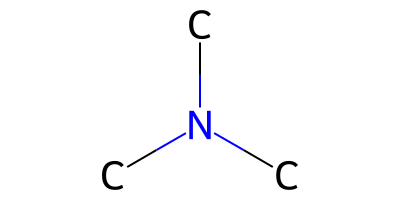

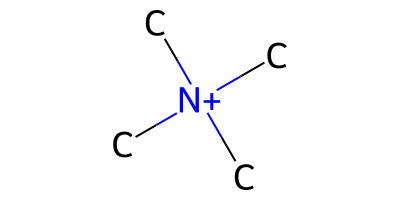

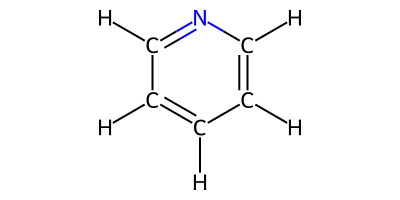

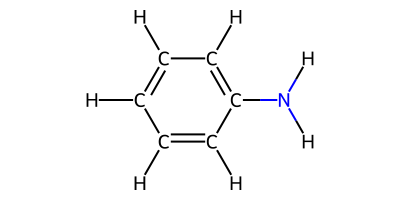

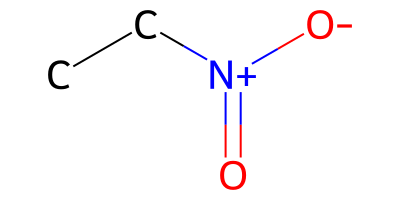

[10:03:55] Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 5


ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.AddHs(NoneType)
did not match C++ signature:
    AddHs(RDKit::ROMol mol, bool explicitOnly=False, bool addCoords=False, boost::python::api::object onlyOnAtoms=None, bool addResidueInfo=False)

In [66]:
# for nitrogens
# for n: sp2 N in amide --> 
smiles = "CC(=O)NC"
plot(smiles)

#for n1: sp1 N 
smiles = "O=[N+]=O"
plot(smiles)

# for n2: sp2 N with 2 subst. readl double bond (not sure what the last part means)
smiles = "CNC"
plot(smiles)

# for n3: sp3 N with 3 subst.
smiles = "CN(C)C"
plot(smiles)

# for n4: sp3 N with 4 subst. 
smiles = "C[N+](C)(C)C"
plot(smiles)

# for na: sp2 N with 3 subst 
smiles = "c1ccncc1"
plot(smiles,True)

# for nh: amine N connected to the aromatic rings  
smiles = "c1ccccc1N"
plot(smiles, True)

# for no: in nitro group
smiles = "CC[N+](=O)[O-]"
plot(smiles)

# for nb: inner sp2 N in conj. ring systems 
smiles = "c1n=cccc1"
plot(smiles,True)

# for nc(nd): inner sp2 N in conj. chain systems 
smiles= "C=N-C=C-C"
plot(smiles, True)


# for n: aromatic nitrogen 
smiles = "c1ccncc1"
plot(smiles)

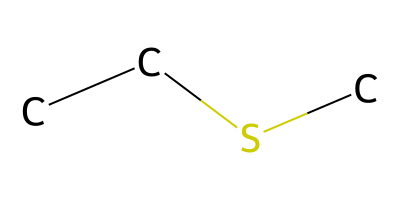

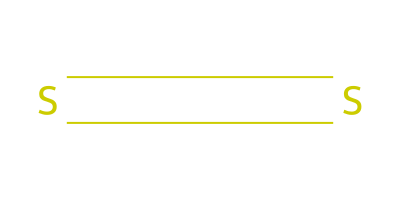

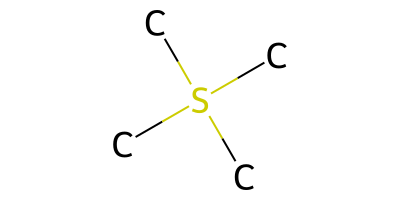

In [62]:
# for s
# for ss: sp3 S in -SR and SS
smiles = "CCSC" #(Methylsulfanyl)ethane
plot(smiles)
smiles="S=S"
plot(smiles)

# for s: tehre is no description..

# for sy: conj. S, 4 subst. 
smiles = "CS(C)(C)C"
plot(smiles)

# other s do not appear in delaney dataset


In [ ]:
# Cl, F, no differentiations